 # Project Name - Apple and Google tweet Sentiment Analysis.

## 1. Business Understanding
### 1.1 Business Overview
In the modern technological era, social media platforms such as Twitter(x) have become powerful sources where users share real-time opinions on brands and products. Companies such as Apple and Google, both global leaders  in technology and innovation, benefit greatly from understanding these public sentiments. Analyzing tweets about them helps reveal consumer opinions, trends and brand perceptions. Since manually reviewing  thousands of tweets is inefficient, automated sentiment analysis provides an effective solution. Classifing tweets as positive,negative or neutral to help companies monitor reputation, improve customer satisfaction  and make informed strategic decisions.

### 1.2 Problem Statement
Twitter(x) is a space where people share their opinions about brands and products. For global technology companies like Apple and Google, these tweets offer valuable insights into customer satisfaction, brand reputation and customer loyalty. However, the large volume of unstructured data makes it difficult to manually analyze the public sentiment in real time. To solve this problem, this project aims at developing an automated sentiment analysis model using Natural Language Processing(NLP) to classify tweets as positive, negative or neutral. This will help the companies better understand consumer perception, respond to feedback quickly and generally improve their products and overall Brand Image.
### 1.3 Business Objectives 
 #### 1.3.1 Main Objective
To build a model that can rate the sentiment of a Tweet based on its content
 #### 1.3.2 Specific Objectives
* To establish patterns and relationships between tweet content and corresponding sentiment categories.
* To identify whether the special characters potray meaningful info.
* To determine the main sentiment drivers.
* To determine which words, phrases or subjects have the greatest influence on whether people see a brand favourably or unfavourably.
* To generate meaningful insights that reflect customer attitude and brand perception in real time.

 #### 1.3.3 Research Questions
1. What patterns and relationships exist between tweet content and the sentiment categories?
2. Do special characters such as @, # and links carry any meaningful information that affects tweet sentiment?
3. What specific features are the main targets of users' emotions towards apple and google?
4. Which machine learning model performs the best in classifying tweet sentiment based on metrics such as accuracy, F1-score, precision and recall?
5. What are the main words, phrases or themes that drive positive/negative sentiment towards these brands and how do these patterns change over time?

### 1.4 Success Criteria
* The project will be successful if it develops an accurate and reliable sentiment classification model that achieves an F1-score of 80% and above and maintains balanced precision and recall across all the sentiment classes.
* Success will also be measured by the model's ability to generalize well to unseen data, minimize missclassification between positive and negative tweets and provide actionable insights that help improve customer services and management of the brand.mrab



## 2. Data Understanding
### 2.1 Data source and Description
- **Source:** This dataset is from CrowdFlower via <a href="https://data.world/crowdflower/brands-and-product-emotions" target="_blank">data.world</a> containing human raters sentiments.

- **Description** The dataset has sentiments from over 9000 twitter users with each row containing a  users tweet_text, emotion_in_tweet_is_directed_at and emotion. Our main target is to use the text and train our model to predict the emotion from the tex

### 2.2 Shape
* The dataset shape is (9093, 4).
* The dataset contains the following columns:
1. tweet_text
2. emotion_in_tweet_is_directed_at
3. is_there_an_emotion_directed_at_a_brand_or_product
   
### 2.3 Datatypes
  * All the columns have object dtype.  t.


## 3. Data Preparation

### 3.1 Data Loading
* Import necessary libraries
* Load Dataset

In [1]:
# importing the necessary libraries
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading Dataset 
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

### 3.2 Data Exploration

In [3]:
# previewing the dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# checking the dimension of the dataset
df.shape

(9093, 3)

In [5]:
# checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
# checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

* We have missing values in tweet_text and emotion_in_tweet_is_directed_at columns.

In [7]:
# checking for duplicates
df.duplicated().sum()

np.int64(22)

* We have 22 duplicates.

### 3.3 Data Cleaning

#### 3.3.1 Handling duplicates
* Since duplicate tweets can bias the model by overrepresenting a particular sentiment, we will drop them.

In [8]:
# removing duplicates
df.drop_duplicates()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


#### 3.3.2 Handling missing values

In [9]:
# imputing for emotion_in_tweet_is_directed_at with unknown
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",Unknown,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",Unknown,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,Unknown,No emotion toward brand or product


In [10]:
# Dropping the missing value in tweet_text
df = df.dropna(subset=['tweet_text'])

In [11]:
# Combine the two sentiment categories into one called 'Neutral' safely
df.loc[:, 'is_there_an_emotion_directed_at_a_brand_or_product'] = (
    df['is_there_an_emotion_directed_at_a_brand_or_product']
    .replace({"No emotion toward brand or product": "Neutral", "I can't tell": "Neutral"})
)

# Check the updated value counts
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())


is_there_an_emotion_directed_at_a_brand_or_product
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64


### 3.4 Exploratory Data Analysis

#### 3.4.1 Univariate Analysis

Text(0.5, 1.0, 'Emotion Proportions')

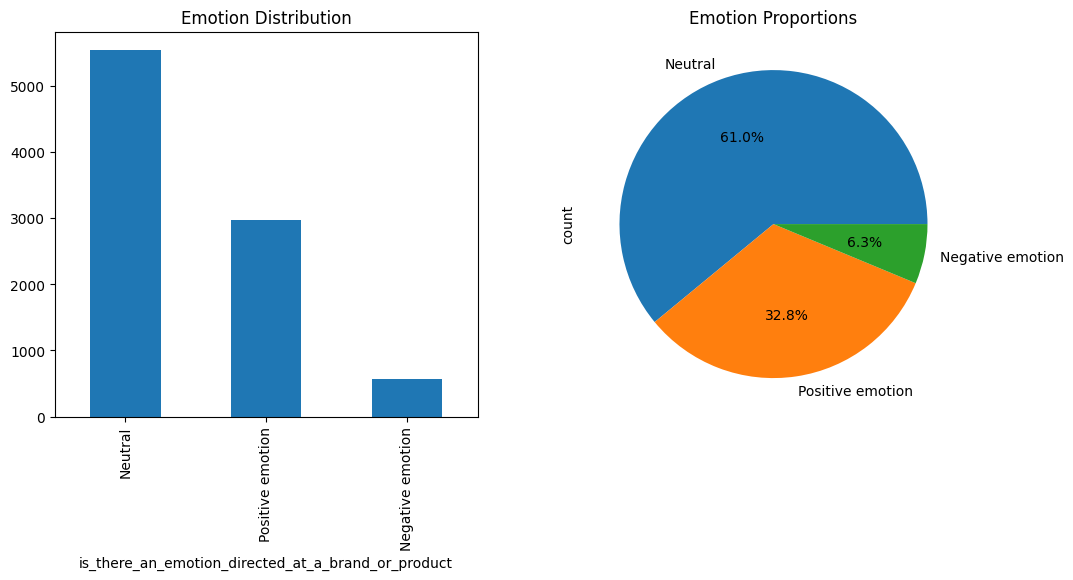

In [12]:
# Distribution of emotions in the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Emotion Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Proportions')

In [13]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
Unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

Missing data on where emotion is directed to: 0/9092 (0.0%)


Text(0.5, 0, 'Count')

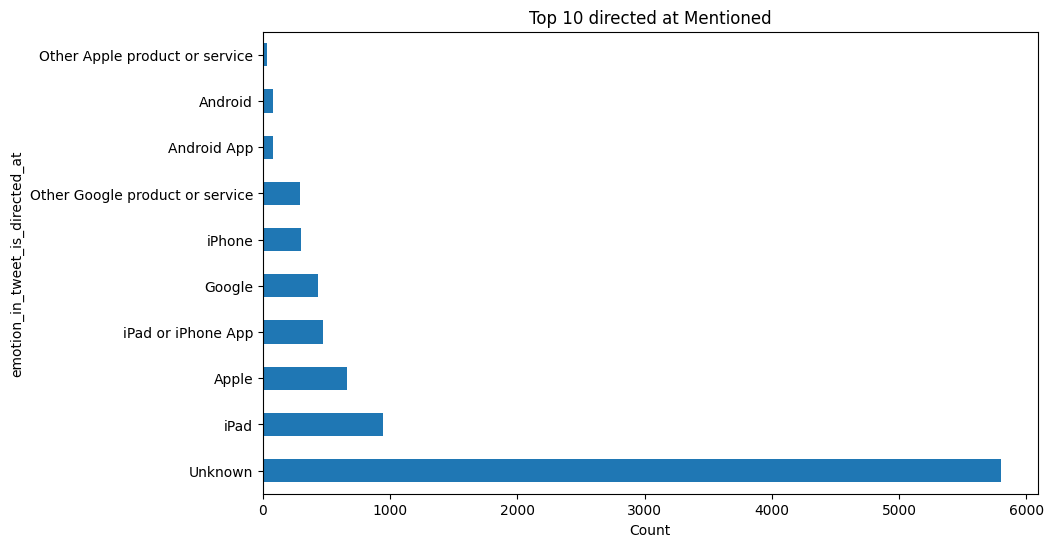

In [14]:
# Missingness analysis
missing_brand = df['emotion_in_tweet_is_directed_at'].isna().sum()
total_length = len(df)
print(f"Missing data on where emotion is directed to: {missing_brand}/{total_length} ({missing_brand/total_length:.1%})")

# Plot for the non-missing values
directed_at_counts = df['emotion_in_tweet_is_directed_at'].value_counts().head(10)
plt.figure(figsize=(10, 6))
directed_at_counts.plot(kind='barh')
plt.title('Top 10 directed at Mentioned')
plt.xlabel('Count')

In [15]:
# Calculating word count
df = df.copy() 
df['char_count'] = df['tweet_text'].str.len()
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
print(df[['tweet_text', 'char_count', 'word_count']].head())

                                          tweet_text  char_count  word_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127          23
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139          22
2  @swonderlin Can not wait for #iPad 2 also. The...          79          15
3  @sxsw I hope this year's festival isn't as cra...          82          15
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131          17


### 3.5 Text Preprocessing

In [16]:
# Downloading necessary resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # remove punctuation
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

In [17]:
# Applying text preprocessing function to the original tweet text
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)
print(df[['tweet_text', 'cleaned_text']].head())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  
0  3g iphone 3 hr tweeting riseaustin dead need u...  
1  know awesome ipadiphone app youll likely appre...  
2                         wait ipad 2 also sale sxsw  
3  hope year festival isnt crashy year iphone app...  
4  great stuff fri sxsw marissa mayer google tim ...  


### 3.6 Feature Engineering

In [18]:
from nltk import bigrams
from collections import Counter

# Tokenizing all cleaned tweets into one list
words = ' '.join(df['cleaned_text']).split()

# Generating bigrams
bigram_list = list(bigrams(words))

# Counting most common bigrams
bigram_counts = Counter(bigram_list)
print(bigram_counts.most_common(10))

[(('sxsw', 'link'), 961), (('ipad', '2'), 947), (('link', 'sxsw'), 872), (('sxsw', 'rt'), 689), (('apple', 'store'), 588), (('link', 'rt'), 540), (('social', 'network'), 455), (('new', 'social'), 417), (('sxsw', 'apple'), 368), (('store', 'sxsw'), 343)]


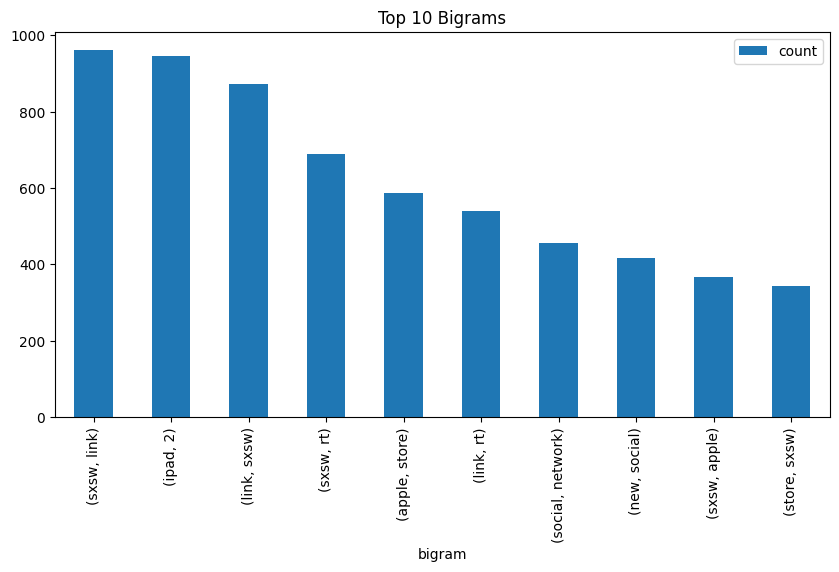

In [19]:
# Visualizing bigrams
bigram_df = pd.DataFrame(bigram_counts.most_common(10), columns=['bigram', 'count'])
bigram_df.plot.bar(x='bigram', y='count', figsize=(10,5), title='Top 10 Bigrams')
plt.show()


* Checking word association strength

In [20]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

# Initialize bigram measures and finder
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(words)

# Filter bigrams that occur less than 50 times
bigram_finder.apply_freq_filter(50)

# Score bigrams using PMI
bigram_pmi_scored = bigram_finder.score_ngrams(bigram_measures.pmi)

# Display top bigrams
print(bigram_pmi_scored[:10])

[(('includes', 'uberguide'), 10.551679796104581), (('marissa', 'mayer'), 8.802357685327943), (('network', 'called'), 7.654555746141707), (('opening', 'temporary'), 7.567609086615015), (('possibly', 'today'), 7.482954965398733), (('set', 'open'), 7.361844629133794), (('social', 'network'), 7.307224807265115), (('circle', 'possibly'), 7.302864930793955), (('launch', 'major'), 7.1663434938880854), (('called', 'circle'), 7.146632513766917)]


* Since the PMI of all the bigrams is high, it means that they are rare individually but frequent together.

[('sxsw', 9509), ('link', 4295), ('rt', 2959), ('google', 2522), ('ipad', 2409), ('apple', 2249), ('iphone', 1512), ('store', 1504), ('2', 1147), ('new', 1089), ('austin', 962), ('app', 807), ('amp', 722), ('launch', 688), ('social', 641), ('circle', 641), ('popup', 599), ('today', 573), ('android', 566), ('network', 471)]


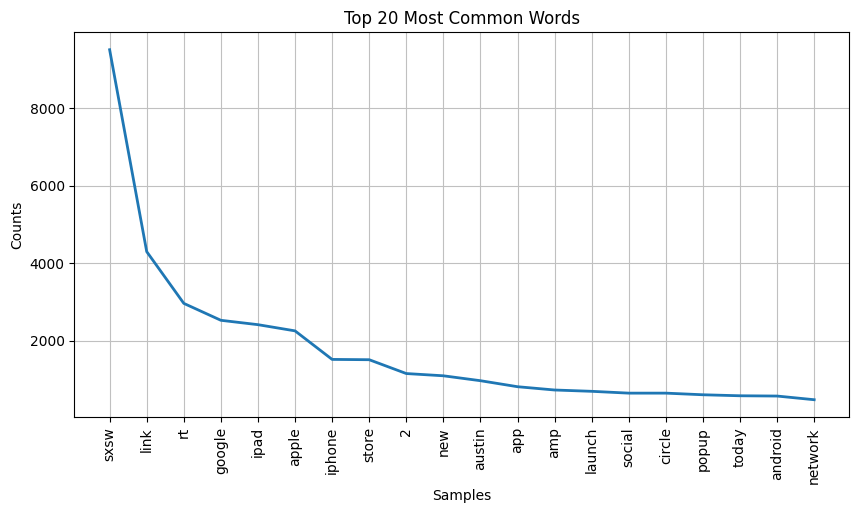

In [21]:
# Computing frequency distribution
freq_dist = FreqDist(words)

# Showing top 20 most common words
print(freq_dist.most_common(20))

# Visualizing
plt.figure(figsize=(10,5))
freq_dist.plot(20, title='Top 20 Most Common Words')
plt.show()

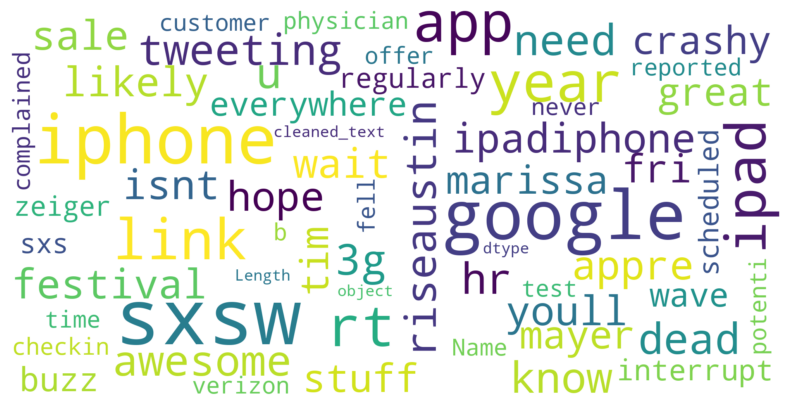

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', random_state=21, max_font_size=40,scale=5).generate(str(df['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* The two visualization show that **SXSW**, **link**, **rt**, **google**, **ipad**, **apple** and **Iphone** are the most common words in our preprocessed tweet dataset. 

In [23]:
#  Creating a new feature 'contains_sxsw' to check if the word 'sxsw' appears in each tweet
df['contains_sxsw'] = df['cleaned_text'].apply(lambda x: 1 if 'sxsw' in x else 0)
print(df['contains_sxsw'].value_counts())

contains_sxsw
1    9084
0       8
Name: count, dtype: int64


* 1 represents contains while 0 means does not contain 
*  SXSW(South by southwest event) is dominating the dataset.

* Almost all tweets contain sxsw.
* Since it's more of a contextual keyword for the event, we are going to drop given that it does not add sentiment meaning.It can bias TF-IDF and other vectorization methods, making the model focus on 'sxsw' instead of meaningful product-related words.
* We are also going to drop rt(which is a structure and it appears when someone retweets a tweet) and link(placeholder for URls) since our focus are on brands sentiments.

In [24]:
# dropping sxsw, link, rt
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\b(sxsw|rt|link)\b', '', regex=True)

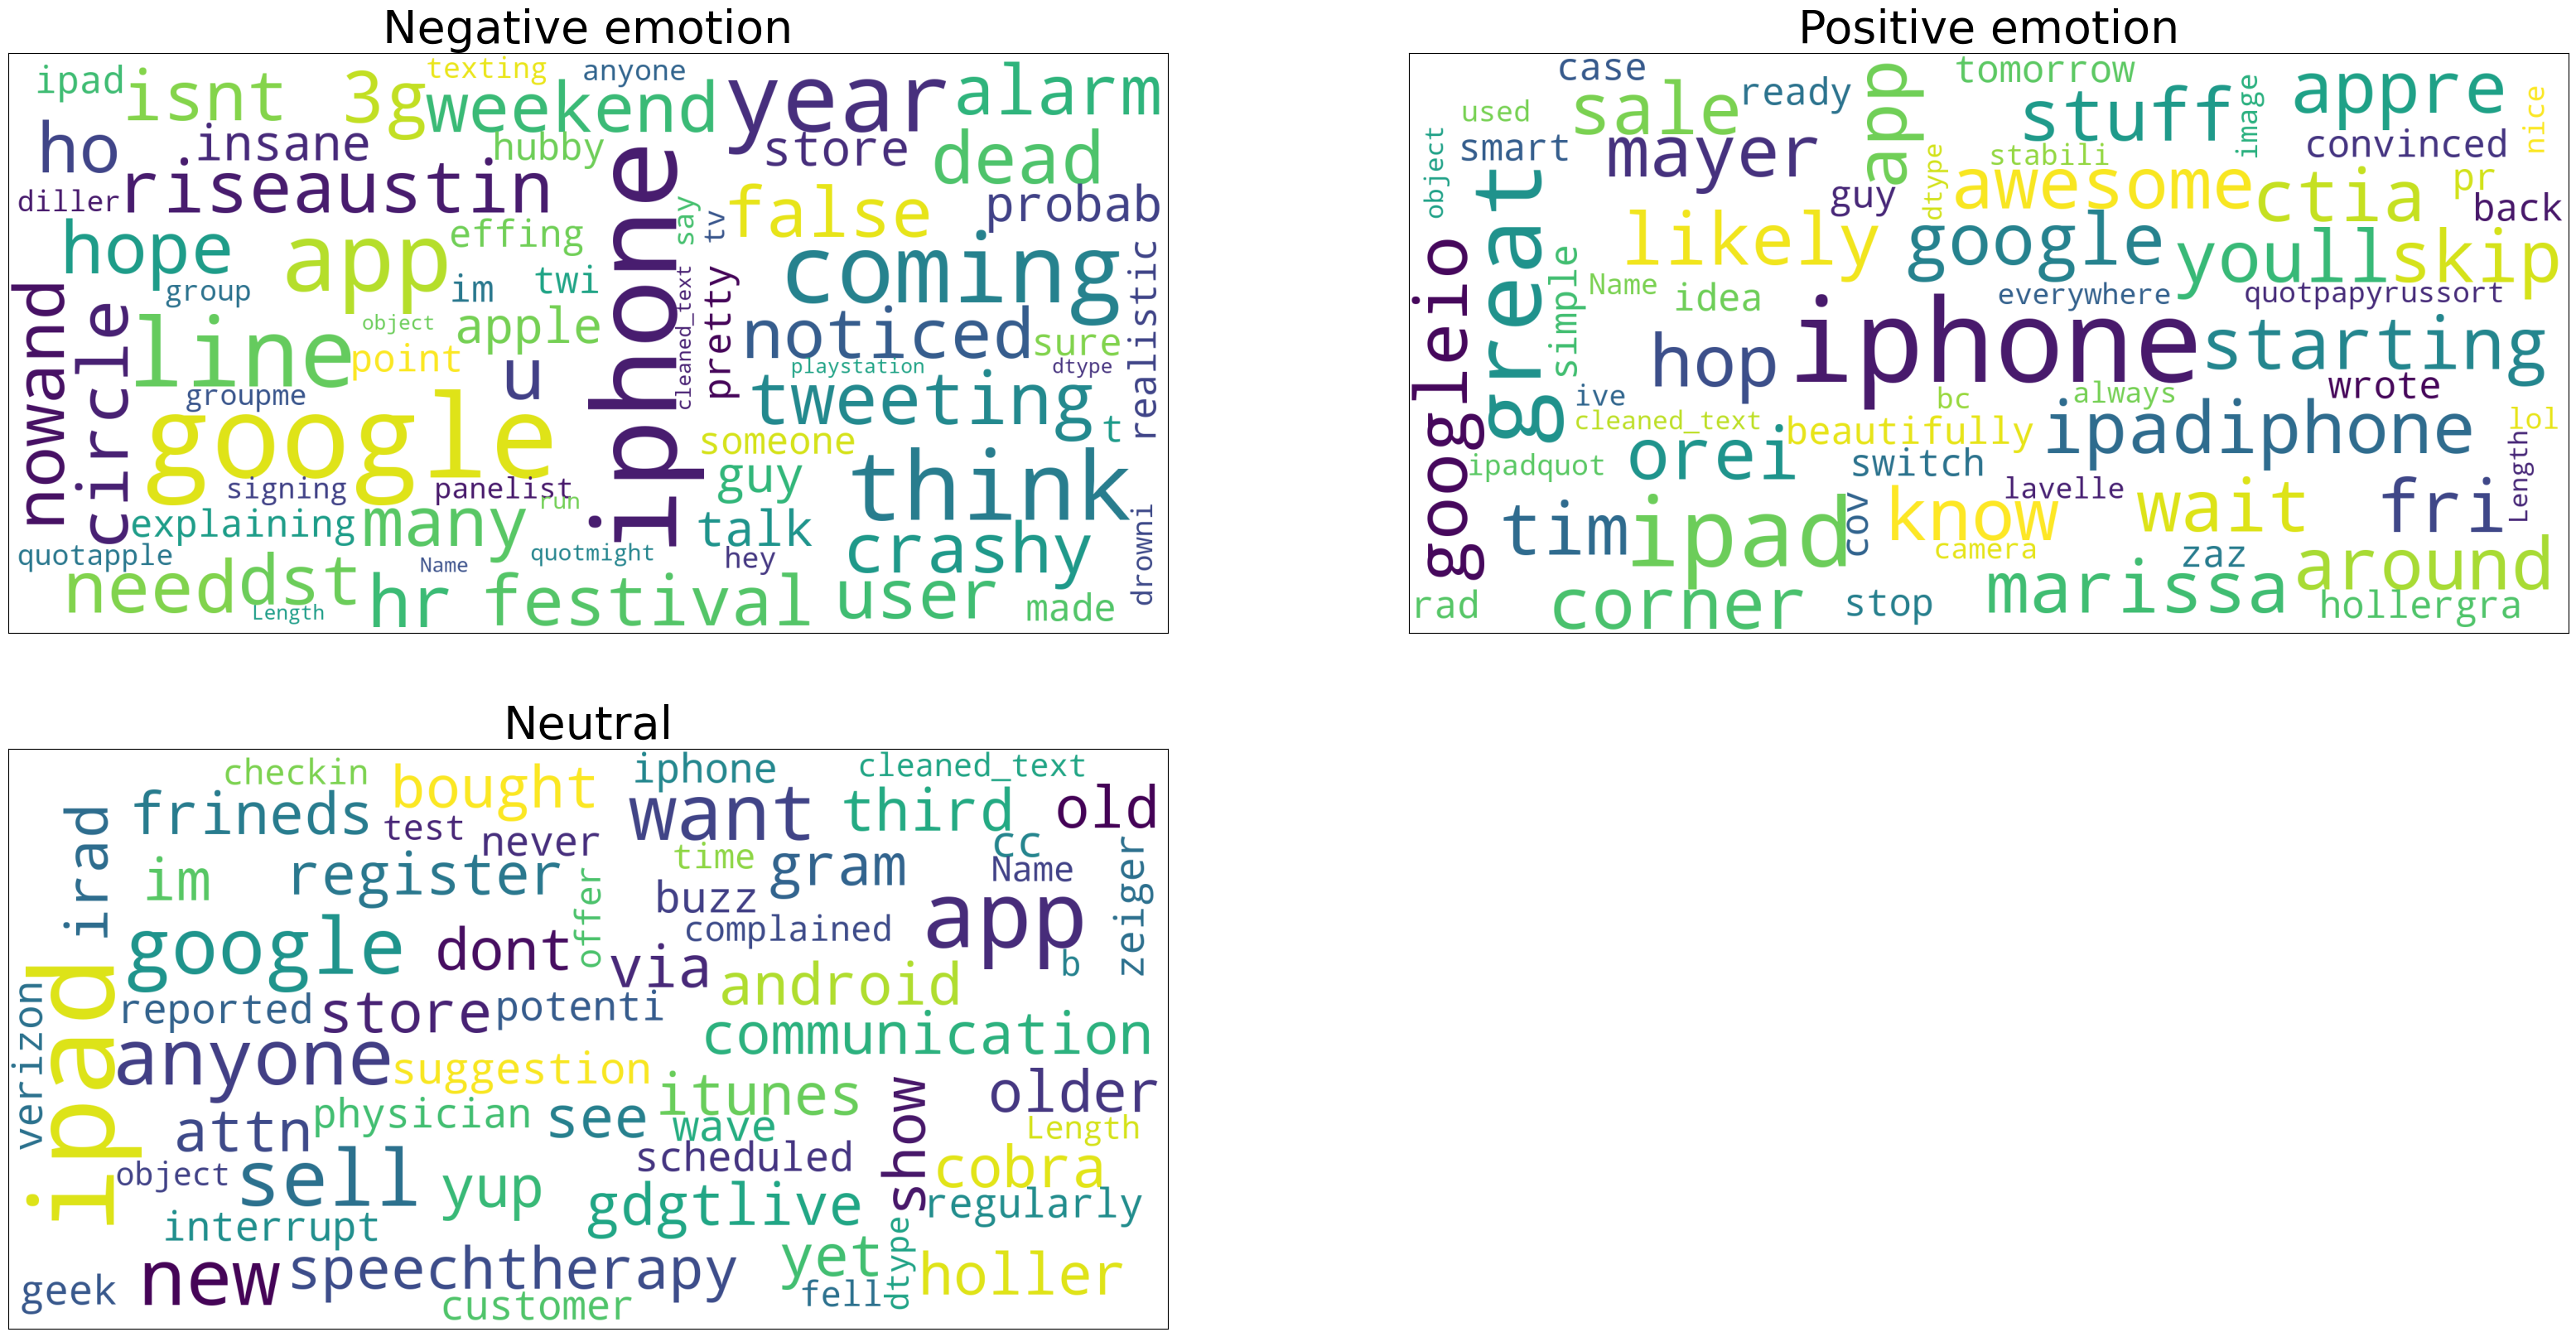

<Figure size 640x480 with 0 Axes>

In [25]:
# plotting 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()):
    plt.subplot(2,2, index+1)
    # printing col
    df1 = df[df['is_there_an_emotion_directed_at_a_brand_or_product']==col]
    data = df1['cleaned_text']
    wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, scale=5).generate(str(data))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

* **Google**, **Ipad**, **apple**, **iphone** are the most common words now. Brand is the main topic of debate, with tweets also concentrating on the type of brand and the functionality of the program. Frequent use of phrases like "appreciate" may indicate a generally favorable emotion, whereas the use of words like "dead" may imply comments about a specific brand or app performing poorly, which would indicate a negative emotion. Following extensive text cleaning, the visualization offers a quick, understandable overview of the dataset.

### **Word Cloud Analysis by Emotion Category**

To illustrate the distinctive words that characterize each emotional category, word clouds representing the three sentiment categories are compared.

**Positive emotion**
The word cloud for positive emotions shows words related to contentment. Words like **beautifully**, **simple**  have been used to convey approval, pleasure, and good experiences.

**Negative emotion** 
Words that convey discontent and criticism can be found in the negative emotion word cloud. Words like **crashing**, **dead**, draw attention to grievances, issues, and bad experiences. This terminology frequently alludes to problems, setbacks, and undesirable results.

**Neutral emotion**
Factual and objective terminology can be found in the neutral emotion word cloud.  Common terms like "google," "app," "third," "store," and "Android" stand for broad knowledge, context, and observational content that isn't highly emotionally charged.  These phrases usually don't have a definite positive or negative bias and represent commonplace circumstances.


### **Vectorization**

In [26]:
# Initializing vectorizer
tfidf = TfidfVectorizer(max_features=20)

# Fit and transform
tfidf_vectors = tfidf.fit_transform(df['cleaned_text'])

# Create DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names_out())

# Display top TF-IDF words
print(tfidf_df.head())

        amp  android       app  apple  austin  circle  get    google  ipad  \
0  0.000000      0.0  0.000000    0.0     0.0     0.0  0.0  0.000000   0.0   
1  0.000000      0.0  1.000000    0.0     0.0     0.0  0.0  0.000000   0.0   
2  0.000000      0.0  0.000000    0.0     0.0     0.0  0.0  0.000000   1.0   
3  0.000000      0.0  0.777852    0.0     0.0     0.0  0.0  0.000000   0.0   
4  0.836087      0.0  0.000000    0.0     0.0     0.0  0.0  0.548597   0.0   

   ipad2    iphone  launch  line  network  new  popup  social  store  today  \
0    0.0  1.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
1    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
2    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
3    0.0  0.628447     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
4    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   

   via  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


In [27]:
# initializing vectorizer with high dimensions
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 74069 stored elements and shape (9092, 3000)>

* Visualizing high dimensional tweet-data reduced to two main components(PCA1 and PCA2).

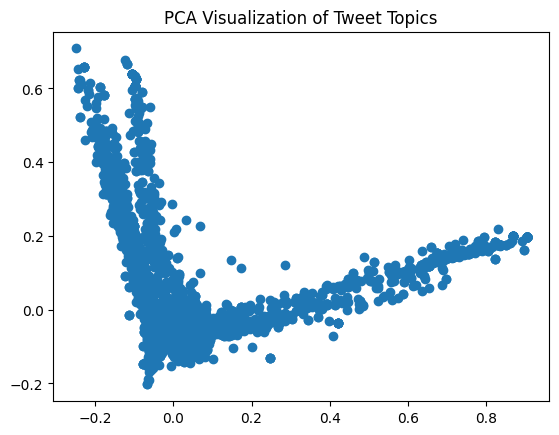

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Visualization of Tweet Topics")
plt.show()


In [29]:
# Checking if we are working with a sparse matrix
import scipy.sparse
# Checking type
type(X_tfidf)

scipy.sparse._csr.csr_matrix

* For PCA and clustering, we will convert our compressed sparse matrix to dense using .toarray().

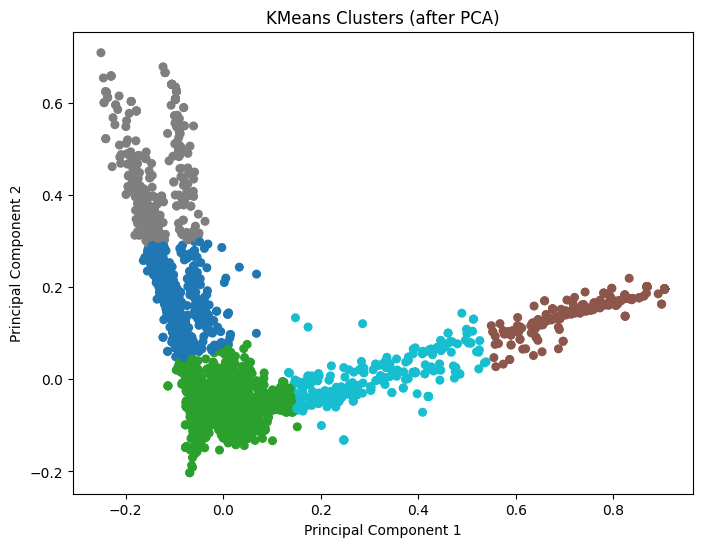

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying PCA to reduce dimensionality for visualization and speed
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Add cluster labels to your dataframe
df['cluster'] = labels

# Visualizing PCA components cluster colors
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title('KMeans Clusters (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [31]:
pca.explained_variance_ratio_

array([0.02920813, 0.01991604])

# 4. Modelling

# 4.1 Logistic Classification

### 4.1.1 Binary classification

In [32]:
# renaming is_there_an_emotion_directed_at_a_brand_or_product to sentiment
df = df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

In [33]:
df['sentiment'].value_counts()


sentiment
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64

                  precision    recall  f1-score   support

Negative emotion       0.90      0.08      0.14       115
Positive emotion       0.85      1.00      0.92       595

        accuracy                           0.85       710
       macro avg       0.87      0.54      0.53       710
    weighted avg       0.86      0.85      0.79       710



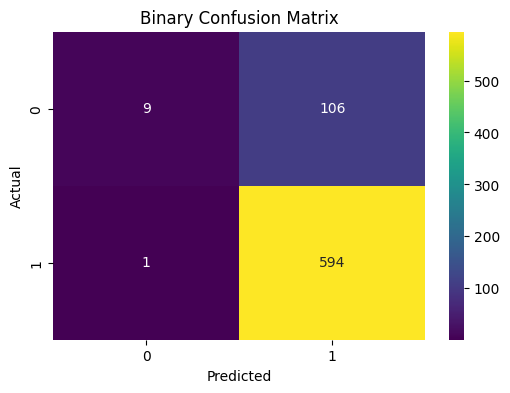

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Filtering to binary classes
df_binary = df[df['sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()
df_binary.reset_index(drop=True, inplace=True)

# Preparing data
X_bi = df_binary['cleaned_text'].fillna('').astype(str)
y_bi = df_binary['sentiment']

# stratify=y ensures the class distribution in train/test sets is the same as in the full dataset.
X_train, X_test, y_train, y_test = train_test_split( X_bi, y_bi , test_size=0.2, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.1.2 Multiclass classification

                  precision    recall  f1-score   support

Negative emotion       0.83      0.09      0.16       114
         Neutral       0.71      0.89      0.79      1109
Positive emotion       0.66      0.45      0.54       596

        accuracy                           0.70      1819
       macro avg       0.73      0.48      0.49      1819
    weighted avg       0.70      0.70      0.67      1819



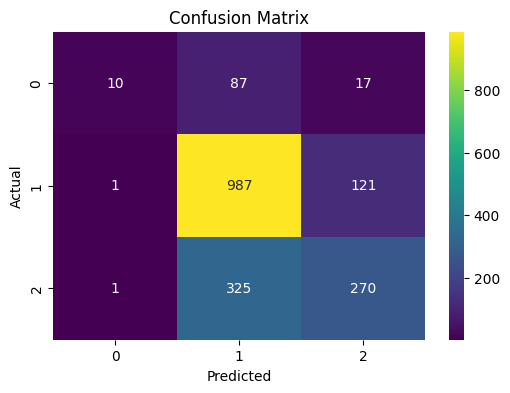

In [35]:
# prepare data
X = df['cleaned_text']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* The dataset is imbalanced since  neutral sentiment dominates the dataset. High F1 score and accuracy in neutral class but performs poorly on Positive and Negative classes, this shows that the model **biased** towards the majority class.

* Applying balance to classes using **class_weight='balanced'** to adjusts the weights of each class inversely proportional to their frequencies.

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.30      0.57      0.39       114
         Neutral       0.76      0.66      0.71      1109
Positive emotion       0.56      0.60      0.58       596

        accuracy                           0.63      1819
       macro avg       0.54      0.61      0.56      1819
    weighted avg       0.67      0.63      0.65      1819



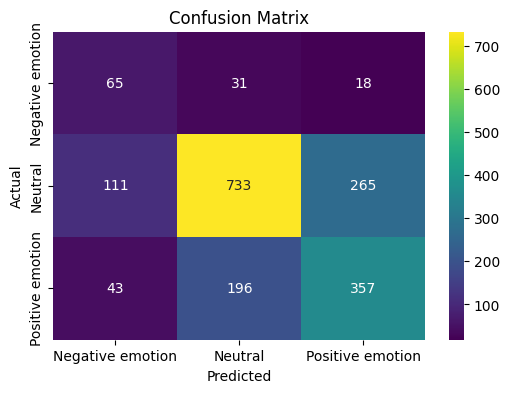

In [36]:
# 1. Prepare data
X = df['cleaned_text']
y = df['sentiment']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline with class_weight='balanced'
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Applying **RandomOverSampler**  to ensure that the clases are balanced.

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.32      0.53      0.40       114
         Neutral       0.77      0.70      0.73      1109
Positive emotion       0.58      0.61      0.60       596

        accuracy                           0.66      1819
       macro avg       0.56      0.61      0.58      1819
    weighted avg       0.68      0.66      0.67      1819



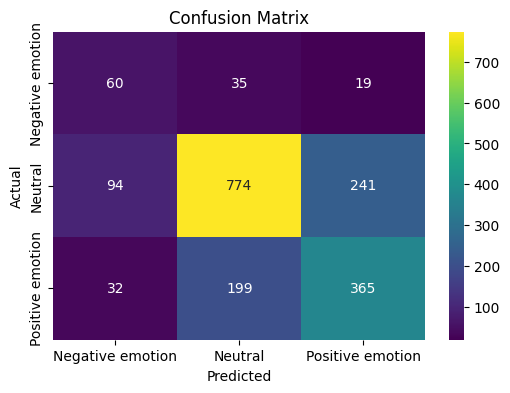

In [37]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Data preparation
X = df['cleaned_text']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline with RandomOverSampler
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote',SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])


# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Hyper_parameter Tuning using GridSearchCV**

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'clf__C': [0.1, 1, 10]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'clf__C': 10, 'tfidf__max_features': 7000}


Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.41      0.52      0.46       114
         Neutral       0.76      0.72      0.74      1109
Positive emotion       0.58      0.62      0.60       596

        accuracy                           0.67      1819
       macro avg       0.58      0.62      0.60      1819
    weighted avg       0.68      0.67      0.67      1819



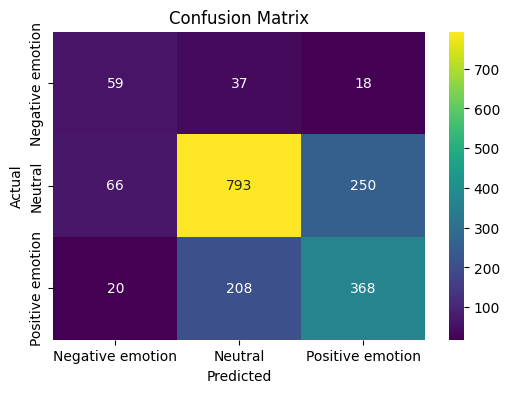

In [39]:
# 1. Prepare data
X = df['cleaned_text']
y = df['sentiment']

# Split data with stratified class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Final pipeline with RandomOverSampler and tuned hyperparameters
final_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),# Oversample only training data
    ('clf', LogisticRegression(max_iter=1000, C=10, penalty='l2',solver = 'liblinear'))  
])

# Train the model
final_pipeline.fit(X_train, y_train)

# Predict
y_pred = final_pipeline.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=final_pipeline.classes_, yticklabels=final_pipeline.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [40]:
X = df['cleaned_text']
y = df['sentiment']

In [41]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
pipeline = Pipeline([
    ('tdif',TfidfVectorizer(ngram_range=(1,2))),
    #('smote',SMOTE(random_state=42)),
    ('model',RandomForestClassifier(class_weight='balanced'))
])

In [46]:
#Function to train the model ,make predictions and calculate evaluation metrics
def modelling(pipe):
    pipe.fit(X_train, y_train)
    
    # Predict train and test data
    y_hat_train = pipe.predict(X_train)
    y_hat_test = pipe.predict(X_test)

    # classification report
    # For training set
    print("Training Classification Report:")
    print(classification_report(y_train, y_hat_train))

    # For testing set
    print("Testing Classification Report:")
    print(classification_report(y_test, y_hat_test))

    base_train_accuracy = accuracy_score(y_train, y_hat_train)
    base_test_accuracy = accuracy_score(y_test, y_hat_test)

    print("Difference between train and test accuracy")
    print(base_train_accuracy-base_test_accuracy)

In [47]:

rdf = modelling(pipeline)
rdf

Training Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.90      1.00      0.95       456
         Neutral       0.98      0.95      0.97      4435
Positive emotion       0.93      0.97      0.95      2382

        accuracy                           0.96      7273
       macro avg       0.94      0.97      0.95      7273
    weighted avg       0.96      0.96      0.96      7273

Testing Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.63      0.25      0.36       114
         Neutral       0.69      0.86      0.77      1109
Positive emotion       0.63      0.41      0.49       596

        accuracy                           0.68      1819
       macro avg       0.65      0.51      0.54      1819
    weighted avg       0.67      0.68      0.65      1819

Difference between train and test accuracy
0.2821433503555326


In [49]:
from sklearn.naive_bayes import MultinomialNB
pipeline.set_params(model = MultinomialNB())
nb =  modelling(pipeline)
nb

Training Classification Report:
                  precision    recall  f1-score   support

Negative emotion       1.00      0.04      0.07       456
         Neutral       0.76      0.99      0.86      4435
Positive emotion       0.96      0.60      0.74      2382

        accuracy                           0.81      7273
       macro avg       0.91      0.54      0.56      7273
    weighted avg       0.84      0.81      0.77      7273

Testing Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.50      0.01      0.02       114
         Neutral       0.65      0.96      0.78      1109
Positive emotion       0.75      0.23      0.36       596

        accuracy                           0.66      1819
       macro avg       0.63      0.40      0.38      1819
    weighted avg       0.67      0.66      0.59      1819

Difference between train and test accuracy
0.14216815687443607
